In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import animation
from JSAnimation import IPython_display


In [2]:
def ew2py(fileName):
    """
        Reads EasyWave binary output into numpy arrays. 
        Works for .ssh and .sshmax files (at least).
        
        Example usage:

        lon, lat, h = ew2py(fileName)    
        plt.pcolormesh(lon,lat,h)
    """
    import struct
    from numpy import zeros, linspace

    f = open(fileName, 'rb')
    dsbb = f.read(4)

    nOutI = struct.unpack('h',f.read(2))[0]
    nOutJ = struct.unpack('h',f.read(2))[0]
    
    lonOutMin = struct.unpack('d',f.read(8))[0]
    lonOutMax = struct.unpack('d',f.read(8))[0]
    latOutMin = struct.unpack('d',f.read(8))[0]
    latOutMax = struct.unpack('d',f.read(8))[0]
    
    tmp = f.read(8)
    tmp = f.read(8)

    lon = linspace(lonOutMin,lonOutMax,nOutI)
    lat = linspace(latOutMin,latOutMax,nOutJ)
    values = zeros((nOutJ,nOutI))

    for j in range(nOutJ):
        for i in range(nOutI):
            value = f.read(4)
            value = struct.unpack('f',value)[0]
            values[j,i] = value
    return nOutI, nOutJ, lon, lat, values

In [3]:
!head ../bathymetry/horizontal.grd -n 5

DSAA
600 600
-60.000 60.200
-60.000 60.200
-1000.000 -1000.000


In [4]:
easywaveBathymetry = np.loadtxt('../bathymetry/horizontal.grd',skiprows=5)

lonBathymetry = np.linspace(-60,60,300)
latBathymetry = np.linspace(-60,60,300)

In [5]:
import pandas as pd

tsunamilab = pd.read_csv('../tsunamilab/tseries')

tsunamilab.head()

,minutes,a,b,c,d,e,f,g,h,i
0,0.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.005686,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.028805,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.068135,1.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.121597,9.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
easywave = pd.read_csv('../easyWave/eWave.poi.ssh', sep='  ', engine='python')
easywave.head()

,Minute,a,b,c,d,e,f,g,h,i,j
0,0.0,1.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,0.936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
for c in 'abc':
    print(c)

a
b
c


(0, 0.7)

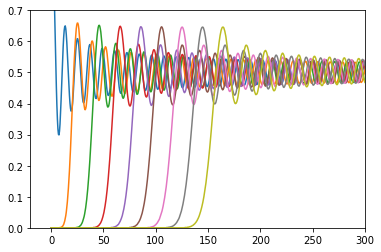

In [27]:
key = 'i'
for key in 'abcdefghi':
    plt.plot(easywave['Minute'], easywave[' '+key])
plt.xlim(-20,300)
plt.ylim(0,0.7)

(-20, 300)

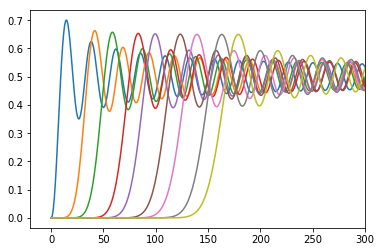

In [24]:
key = 'i'
for key in 'abcdefghi':
    plt.plot(tsunamilab['minutes'],tsunamilab[key])

# plt.plot(easywave['Minute'], easywave[' '+key],'g')
plt.xlim(-20,300)

(-20, 300)

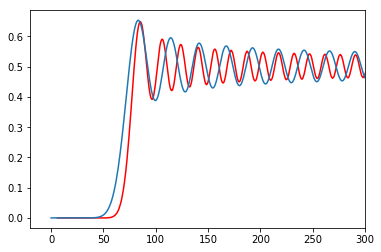

In [64]:
key = 'd'
plt.plot(easywave['Minute']*1.2+6, easywave[' '+key],'r')
plt.plot(tsunamilab['minutes'],tsunamilab[key])

# plt.plot(easywave['Minute'], easywave[' '+key],'g')
plt.xlim(-20,300)